In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **1 - Problem Definition**

Create an ML model that can predict house prices effectively.

# **2 - Build Dataset**

## **Data Collection**

In [152]:
houses_df=pd.read_csv('house_prices.csv')

In [117]:
copy_df=houses_df.copy()

1-Supervised Type of Data (Data with Target Variable)
2-Unsupervised Type of Data (Data with no Target Variable)

### **Problem Type**

We are given target feature 'SalesPrice'. So, this is supervised machine learning problem

## **Data Inspection**

1- Check inconsistency in the data
2- Outliers
3- Data Transformation
4- Fill missing values

### **Null Values**

In [142]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    stats_df.set_index('Feature', drop=True, inplace=True)
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df
statistics(houses_df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
PoolQC,3,1453,99.520548,object
Fence,4,1179,80.753425,object
FireplaceQu,5,690,47.260274,object
GarageType,6,81,5.547945,object
GarageYrBlt,97,81,5.547945,float64
GarageFinish,3,81,5.547945,object
GarageQual,5,81,5.547945,object
GarageCond,5,81,5.547945,object
BsmtExposure,4,38,2.602740,object


### **Hanlding Missing Values**

### Removing the Null values where their percentage is less than 10%

In [119]:
houses_df.dropna(axis=0,subset=['GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCond','BsmtCond','BsmtCond','BsmtExposure','BsmtFinType2','Electrical','GarageType'],inplace=True)

### Categorical

In [120]:
houses_df['FireplaceQu'].fillna('Gd',inplace=True)

In [121]:
houses_df['Fence'].fillna('MnPrv',inplace=True)

In [122]:
houses_df['PoolQC'].fillna('Gd',inplace=True)

In [123]:
#plt.figure(figsize=(16,9))
#for i,var in enumerate(['FireplaceQu']):
 #   plt.subplot(4,3,i+1)
  #  plt.hist(houses_df[var],label="Impute")
   # plt.hist(copy_df[var].dropna(),label="Original")
    #plt.legend()

In [124]:
null_val_feat=[]

In [125]:
for feature in copy_df.columns:
    if copy_df[feature].isnull().sum()/houses_df.shape[0]*100>=20:
        null_val_feat.append(feature)
        print(feature)

FireplaceQu
PoolQC
Fence


### Results after Missing vale Imputations

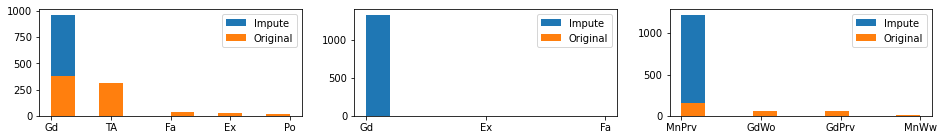

In [126]:
plt.figure(figsize=(16,9))
for i,var in enumerate(null_val_feat):
    plt.subplot(4,3,i+1)
    plt.hist(houses_df[var],label="Impute")
    plt.hist(copy_df[var].dropna(),label="Original")
    plt.legend()

### Cleaned Data

In [127]:
import missingno as msno

<AxesSubplot:>

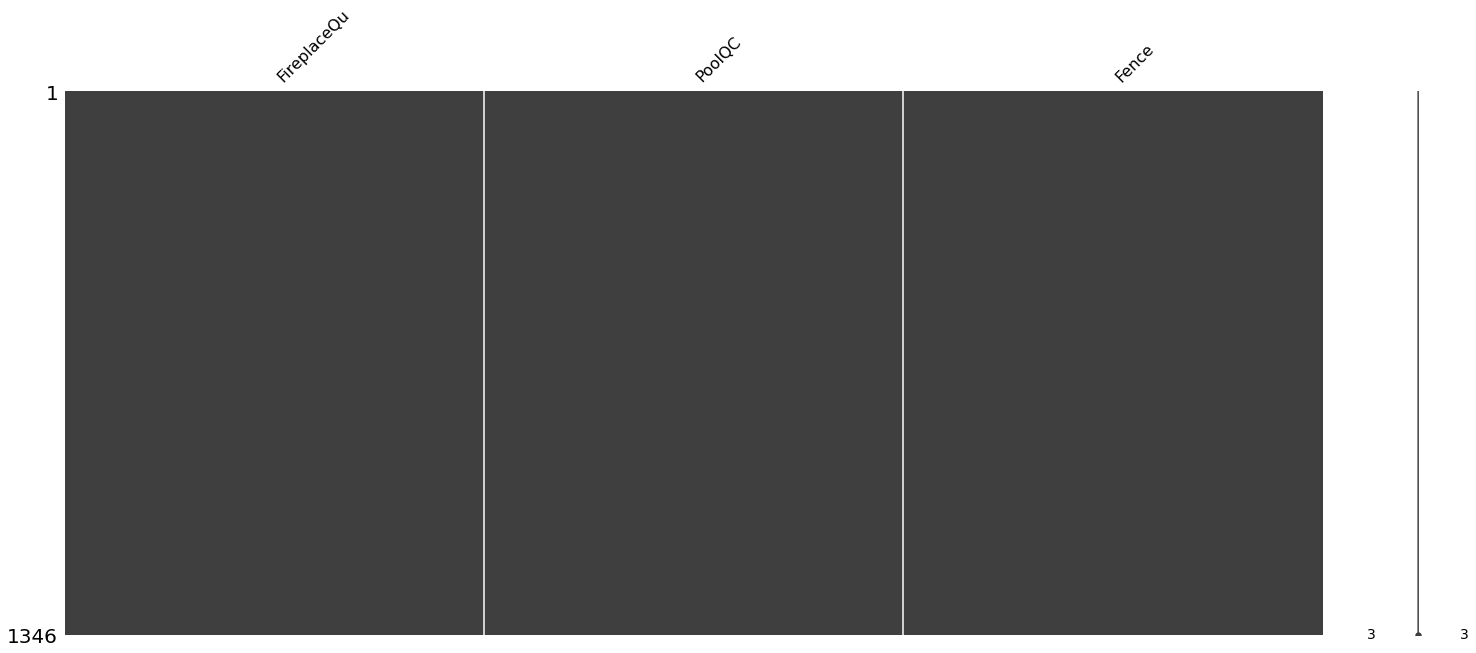

In [128]:
msno.matrix(houses_df[null_val_feat])

### **Summary Statistics**

### Shape of Data

In [129]:
houses_df.shape

(1346, 57)

### Dataset Statistics

In [136]:
# Function to perform all EDA
def perform_eda(df, name=""):
    # Printing basic detail of data like name, size, shape
    print(f"EDA of {str(name)} Data....")
    print(f"Size {df.size}")
    print(f"Columns {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*50)
    
    # Printing top 5 records of data
    print("First Look of Data....")
    display(df.head())
    print("="*50)
    
    # Getting Numerical and Categorical columns Separately
    cat_cols = df.select_dtypes(np.object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Printing the Numerical columns
    print("Dataset has following Numerical columns...")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")

    # Printing the Categorical columns
    print("\n\nDataset has following Categorical columns...")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")
    
    # Printing info of data like data type, non null values
    print("="*50)
    print("Information of Data....")
    print(df.info())
    print("="*50)
    
    # Displaying statistical properties of data like mean, median, max, min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)
    
    # Displaying correlation of numerical features
    corr = df.corr(method="kendall").style.background_gradient("YlOrRd_r")
    print("Correlation of Numerical features....")
    display(corr)


In [137]:
perform_eda(houses_df)

EDA of  Data....
Size 76722
Columns 57
Records 1346
First Look of Data....


,Id,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,PavedDrive,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,...,Y,0,Gd,MnPrv,0,2,2008,WD,Normal,208500
1,2,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,...,Y,0,Gd,MnPrv,0,5,2007,WD,Normal,181500
2,3,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,...,Y,0,Gd,MnPrv,0,9,2008,WD,Normal,223500
3,4,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,...,Y,0,Gd,MnPrv,0,2,2006,WD,Abnorml,140000
4,5,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,...,Y,0,Gd,MnPrv,0,12,2008,WD,Normal,250000


Dataset has following Numerical columns...
 1) Id
 2) OverallQual
 3) OverallCond
 4) YearBuilt
 5) YearRemodAdd
 6) BsmtFinSF1
 7) BsmtFinSF2
 8) BsmtUnfSF
 9) TotalBsmtSF
 10) 1stFlrSF
 11) 2ndFlrSF
 12) LowQualFinSF
 13) GrLivArea
 14) BsmtFullBath
 15) BsmtHalfBath
 16) FullBath
 17) HalfBath
 18) BedroomAbvGr
 19) KitchenAbvGr
 20) Fireplaces
 21) GarageYrBlt
 22) GarageCars
 23) GarageArea
 24) PoolArea
 25) MiscVal
 26) MoSold
 27) YrSold
 28) SalePrice


Dataset has following Categorical columns...
 1) Condition1
 2) Condition2
 3) BldgType
 4) HouseStyle
 5) RoofStyle
 6) RoofMatl
 7) ExterQual
 8) ExterCond
 9) Foundation
 10) BsmtQual
 11) BsmtCond
 12) BsmtExposure
 13) BsmtFinType1
 14) BsmtFinType2
 15) Heating
 16) HeatingQC
 17) CentralAir
 18) Electrical
 19) KitchenQual
 20) FireplaceQu
 21) GarageType
 22) GarageFinish
 23) GarageQual
 24) GarageCond
 25) PavedDrive
 26) PoolQC
 27) Fence
 28) SaleType
 29) SaleCondition
Information of Data....


<ipython-input-136-f4903b215c21>:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols = df.select_dtypes(np.object).columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   Condition1     1346 non-null   object 
 2   Condition2     1346 non-null   object 
 3   BldgType       1346 non-null   object 
 4   HouseStyle     1346 non-null   object 
 5   OverallQual    1346 non-null   int64  
 6   OverallCond    1346 non-null   int64  
 7   YearBuilt      1346 non-null   int64  
 8   YearRemodAdd   1346 non-null   int64  
 9   RoofStyle      1346 non-null   object 
 10  RoofMatl       1346 non-null   object 
 11  ExterQual      1346 non-null   object 
 12  ExterCond      1346 non-null   object 
 13  Foundation     1346 non-null   object 
 14  BsmtQual       1346 non-null   object 
 15  BsmtCond       1346 non-null   object 
 16  BsmtExposure   1346 non-null   object 
 17  BsmtFinType1   1346 non-null   object 
 18  BsmtFinS

,Id,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,PavedDrive,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1346.000000,1346,1346,1346,1346,1346.000000,1346.000000,1346.000000,1346.000000,1346,...,1346,1346.000000,1346,1346,1346.000000,1346.000000,1346.000000,1346,1346,1346.000000
unique,NaN,9,8,5,8,NaN,NaN,NaN,NaN,6,...,3,NaN,3,4,NaN,NaN,NaN,9,6,NaN
top,NaN,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,...,Y,NaN,Gd,MnPrv,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1170,1332,1145,662,NaN,NaN,NaN,NaN,1044,...,1265,NaN,1342,1228,NaN,NaN,NaN,1163,1108,NaN
mean,731.955423,NaN,NaN,NaN,NaN,6.225854,5.592125,1973.182021,1985.761516,NaN,...,NaN,2.992571,NaN,NaN,42.677563,6.335810,2007.806092,NaN,NaN,187057.309807
std,421.422088,NaN,NaN,NaN,NaN,1.326129,1.078025,29.567218,20.286616,NaN,...,NaN,41.836999,NaN,NaN,506.553810,2.703737,1.329782,NaN,NaN,79062.790355
min,1.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,1880.000000,1950.000000,NaN,...,NaN,0.000000,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,35311.000000
25%,367.250000,NaN,NaN,NaN,NaN,5.000000,5.000000,1956.000000,1968.000000,NaN,...,NaN,0.000000,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,135000.000000
50%,731.500000,NaN,NaN,NaN,NaN,6.000000,5.000000,1976.000000,1995.000000,NaN,...,NaN,0.000000,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,169500.000000
75%,1098.750000,NaN,NaN,NaN,NaN,7.000000,6.000000,2001.750000,2004.000000,NaN,...,NaN,0.000000,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,220000.000000


Correlation of Numerical features....


,Id,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.026810,0.004582,-0.009748,-0.010675,-0.006264,-0.003786,-0.009355,-0.025247,0.001510,-0.001960,-0.024228,-0.003791,0.012251,-0.023153,0.001236,-0.011377,0.029494,0.009125,-0.011526,-0.001281,0.006516,0.002988,0.046978,-0.022095,0.016090,0.000686,-0.018689
OverallQual,-0.026810,1.000000,-0.199051,0.509799,0.444103,0.061242,-0.135752,0.186155,0.320161,0.308852,0.233373,-0.029081,0.462931,0.060975,-0.069540,0.542362,0.241232,0.087050,-0.126165,0.339938,0.475122,0.534632,0.397185,0.048626,-0.077219,0.048858,-0.012836,0.662788
OverallCond,0.004582,-0.199051,1.000000,-0.357827,-0.067293,-0.027441,0.090541,-0.116791,-0.196055,-0.128413,-0.016490,0.031009,-0.133408,-0.070453,0.110469,-0.255609,-0.076356,0.011757,-0.077364,-0.049792,-0.308719,-0.263322,-0.180187,-0.006083,0.096655,-0.008359,0.049338,-0.134588
YearBuilt,-0.009748,0.509799,-0.357827,1.000000,0.649834,0.122453,-0.117820,0.084462,0.281948,0.188258,0.016132,-0.093528,0.181881,0.112447,-0.071407,0.455803,0.182036,-0.048818,-0.122238,0.105243,0.841800,0.491873,0.364007,0.003763,-0.081093,0.009134,-0.006486,0.463810
YearRemodAdd,-0.010675,0.444103,-0.067293,0.649834,1.000000,0.028963,-0.122880,0.112445,0.198777,0.169220,0.040877,-0.042299,0.180917,0.066891,-0.040116,0.370696,0.109020,-0.065726,-0.125582,0.071488,0.648297,0.396494,0.288011,-0.000508,-0.071405,0.013763,0.033271,0.415958
BsmtFinSF1,-0.006264,0.061242,-0.027441,0.122453,0.028963,1.000000,0.015096,-0.465378,0.284398,0.245126,-0.157008,-0.058267,0.030069,0.562316,0.067174,0.003721,-0.039352,-0.079856,-0.034622,0.141604,0.057535,0.128883,0.162796,0.048155,0.009746,-0.016937,0.022006,0.189399
BsmtFinSF2,-0.003786,-0.135752,0.090541,-0.117820,-0.122880,0.015096,1.000000,-0.242726,0.038186,0.047529,-0.098740,-0.002379,-0.056075,0.137202,0.122754,-0.119823,-0.057959,0.011195,-0.024256,0.013324,-0.132457,-0.096134,-0.028733,0.066113,0.034730,-0.028238,0.023717,-0.062284
BsmtUnfSF,-0.009355,0.186155,-0.116791,0.084462,0.112445,-0.465378,-0.242726,1.000000,0.211484,0.167106,0.029625,0.003782,0.162570,-0.409980,-0.091972,0.221481,-0.037426,0.116888,0.061118,0.037287,0.114182,0.132358,0.069026,-0.034204,-0.031582,0.026524,-0.026504,0.101761
TotalBsmtSF,-0.025247,0.320161,-0.196055,0.281948,0.198777,0.284398,0.038186,0.211484,1.000000,0.768104,-0.227972,-0.077631,0.282527,0.228449,-0.013455,0.269579,-0.139808,0.021980,0.048607,0.241520,0.226599,0.358967,0.332164,0.036717,-0.047563,0.017473,-0.006504,0.408145
1stFlrSF,0.001510,0.308852,-0.128413,0.188258,0.169220,0.245126,0.047529,0.167106,0.768104,1.000000,-0.206393,-0.042865,0.394467,0.198493,0.010196,0.284206,-0.147947,0.082864,0.068585,0.309024,0.159837,0.345289,0.330148,0.058193,-0.034000,0.034056,-0.018495,0.411287


1- Trends in data
2- Scale of data
3- Shape of data

IQR
Mean
Std
....

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


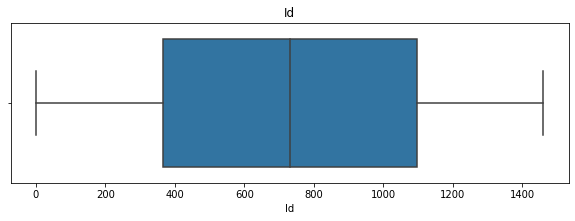

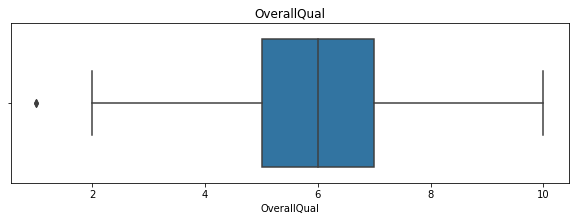

In [204]:

for i,feature in enumerate((houses_df.select_dtypes(np.number).columns)[0:2]):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,i+1)
    sns.boxplot(houses_df[feature])
    plt.title(feature)

In [157]:
X=df.drop(['SalePrice'],axis=1)
y=houses_df['SalePrice']

In [160]:
houses_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [143]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [161]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

ValueError: could not convert string to float: 'Norm'

### **Data Visualization**

1- Line charts
2- Bar charts
3- Pie charts
4- Histograms
.....

# **3 - Model Training**

### **splitting the Data**

-----------------------------Good Practice----------------------------------
1- 80% Training
2- 20% Testing

### **Model Selection**

# **4 - Model Evaluation**

R-sqaure
Precision
Recall
F1-Score
Mean Absolute Error

here are 3 main metrics for model evaluation in regression: R Square/Adjusted R Square. Mean Square Error(MSE)/Root Mean Square Error(RMSE- Average error accros the dataset- this value should be low) Mean Absolute Error(MAE)

### **Loss Calculation**

### **Model Parameters Tuning**

# **5 - Model Inference**

Making Predictions